In [1]:
!pip install pandas
!pip install tweepy
!pip install vaderSentiment

In [2]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
#My Twitter API Authentication Variables
consumer_key = 'dipnlugRdoLYzcD0T74L4mxRJ'
consumer_secret = 'mQrN7r7GEmDP4qadtxpYdVilniIJMMZItDEvMcO8C24b8cfbeZ'
access_token = '453819347-EKPvWrLCmwEgwUAuQjMNErA3TMArgTehrxIhrs9B'
access_token_secret = 'LqhUTxjjJnPd5X1zhmvHHUAEj7PeurpNnYzVm91Wpeg7h'

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

tweets = api.search('Election', count=200)


data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))


print(tweets[0].created_at)


,Tweets
0,समझ में नहीं आ रहा है। . ऐसे भी लोग रहते है इस...
1,RT @MelissaLDavey: Ok this is interesting. The...
2,"Indonesia’s President, Joko Widodo, Leads in U..."
3,RT @carolecadwalla: ‘This is not about left or...
4,RT @tehniadinata: President @jokowi said: “ We...
5,EU parliament elections: live country-by-count...
6,BREAKING: Ekiti Guber: Supreme Court rules on ...
7,RT @MajorPoonia: In busy election campaigning ...
8,RT @dfarrell_ucd: I have some concerns with th...
9,RT @attomeybharti: When Income Tax department ...


2019-04-17 11:22:33


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Guru\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
sid = SentimentIntensityAnalyzer()


listy = []

for index, row in data.iterrows():
  ss = sid.polarity_scores(row["Tweets"])
  listy.append(ss)
  
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head(100))
display(data['polarity'][3])

pos = [x['pos'] for x in data['polarity']]
neg = [x['neg'] for x in data['polarity']]
neu = [x['neu'] for x in data['polarity']]
compound = [x['compound'] for x in data['polarity']]
print('pos:',sum(pos),'neg:',sum(neg),'neu:',sum(neu),'compound:',sum(compound))

,Tweets,polarity
0,समझ में नहीं आ रहा है। . ऐसे भी लोग रहते है इस...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,RT @MelissaLDavey: Ok this is interesting. The...,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
2,"Indonesia’s President, Joko Widodo, Leads in U...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,RT @carolecadwalla: ‘This is not about left or...,"{'neg': 0.042, 'neu': 0.842, 'pos': 0.116, 'co..."
4,RT @tehniadinata: President @jokowi said: “ We...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,EU parliament elections: live country-by-count...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,BREAKING: Ekiti Guber: Supreme Court rules on ...,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp..."
7,RT @MajorPoonia: In busy election campaigning ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,RT @dfarrell_ucd: I have some concerns with th...,"{'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'comp..."
9,RT @attomeybharti: When Income Tax department ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


{'neg': 0.042, 'neu': 0.842, 'pos': 0.116, 'compound': 0.4767}

pos: 7.923999999999999 neg: 5.511000000000001 neu: 72.56400000000001 compound: 5.309299999999999


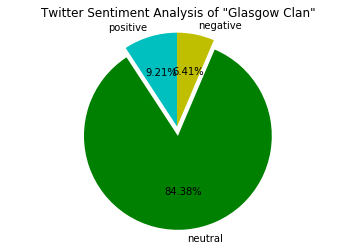

In [18]:
import matplotlib.pyplot as plt
import numpy as np
labels = 'positive', 'neutral', 'negative'
sections = [sum(pos), sum(neu), sum(neg)]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Twitter Sentiment Analysis of "Glasgow Clan"')
plt.show()